# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Anggraini Sagita Santia Putri]
- **Email:** [sagitasantia@gmail.com]
- **ID Dicoding:** []

# Background Dataset

Dataset ini berisi data harian dan jam-jam tertentu mengenai penggunaan layanan bike-sharing selama dua tahun, yaitu 2011 dan 2012. Informasi yang tercakup meliputi tanggal, musim, tahun, bulan, serta hari dalam seminggu. Selain itu, terdapat indikator apakah suatu hari merupakan hari libur atau hari kerja, serta kondisi cuaca mulai dari cerah hingga hujan atau salju lebat. Data suhu, kelembaban, dan kecepatan angin juga dicatat, bersama dengan jumlah pengguna kasual dan terdaftar. Dataset ini memungkinkan analisis mendalam mengenai tren penggunaan bike-sharing berdasarkan faktor waktu dan cuaca, sehingga dapat memberikan wawasan mengenai pola penggunaan sepeda di berbagai kondisi.

##  Pertanyaan Bisnis

1. Bagaimana tren penggunaan layanan bike sharing dalam beberapa tahun terakhir, serta bagaimana pola penggunaannya berdasarkan waktu dan hari-hari dalam seminggu?
2. Apakah ada pengaruh faktor cuaca, seperti musim dan suhu udara, terhadap penggunaan layanan bike sharing?

## Import Semua Packages/Library yang Digunakan

In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

####**IMPORT DATASET**

In [137]:
df_hari = pd.read_csv('https://raw.githubusercontent.com/sagitasantia/dataset_bike/main/day.csv', delimiter=",")
df_jam = pd.read_csv('https://raw.githubusercontent.com/sagitasantia/dataset_bike/main/hour.csv', delimiter=",")

In [138]:
df_hari

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,12/27/2012,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,12/28/2012,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,12/29/2012,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,12/30/2012,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [139]:
df_jam

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


## Data Wrangling

### Gathering Data

### **Analisis Hari/day**

In [140]:
df_hari.head(5), df_jam.head(5)

(   instant    dteday  season  yr  mnth  holiday  weekday  workingday  \
 0        1  1/1/2011       1   0     1        0        6           0   
 1        2  1/2/2011       1   0     1        0        0           0   
 2        3  1/3/2011       1   0     1        0        1           1   
 3        4  1/4/2011       1   0     1        0        2           1   
 4        5  1/5/2011       1   0     1        0        3           1   
 
    weathersit      temp     atemp       hum  windspeed  casual  registered  \
 0           2  0.344167  0.363625  0.805833   0.160446     331         654   
 1           2  0.363478  0.353739  0.696087   0.248539     131         670   
 2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
 3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
 4           1  0.226957  0.229270  0.436957   0.186900      82        1518   
 
     cnt  
 0   985  
 1   801  
 2  1349  
 3  1562  
 4  1600  ,
    instant      

### Assessing Data

In [141]:
df_hari.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [142]:
df_hari.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [143]:
print(f"Duplikat df_hari: {df_hari.duplicated().sum()}")


Duplikat df_hari: 0


In [144]:
df_hari.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


### **Analisis Jam/hour**

In [145]:
df_jam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [146]:
df_jam.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [147]:
print(f"Duplikat df_jam: {df_jam.duplicated().sum()}")

Duplikat df_jam: 0


In [148]:
df_jam.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

In [149]:
drop_columns = ['instant', 'atemp', 'windspeed']
df_jam.drop(columns=drop_columns, inplace=True)

Kolom 'instant' hanya menunjukkan nomor urut data, jadi tidak berguna untuk analisis. 'atemp' adalah suhu yang sudah disesuaikan, tapi kita sudah punya suhu asli ('temp'), jadi tidak perlu dipakai dua kali. 'windspeed' tidak terlalu relevan untuk melihat pengaruh cuaca terhadap penggunaan sepeda, karena suhu dan musim lebih penting untuk dianalisis. Menghapus kolom-kolom ini akan membuat analisis lebih fokus dan efisien.

In [150]:
df_jam.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,casual,registered,cnt
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.81,3,13,16
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.80,8,32,40
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.80,5,27,32
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.75,3,10,13
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.75,0,1,1


In [151]:
df_jam.rename(columns={
    'dteday': 'dateday',
    'yr': 'year',
    'mnth': 'month',
    'hr': 'hour',
    'weathersit': 'weather_condition',
    'cnt': 'count'
}, inplace=True)

df_jam.head()

,dateday,season,year,month,hour,holiday,weekday,workingday,weather_condition,temp,hum,casual,registered,count
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.81,3,13,16
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.80,8,32,40
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.80,5,27,32
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.75,3,10,13
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.75,0,1,1


In [152]:
df_jam['month'] = df_jam['month'].replace([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
                                             ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                                              'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

df_jam['season'] = df_jam['season'].replace([1, 2, 3, 4],
                                              ['Spring', 'Summer', 'Fall', 'Winter'])

df_jam['weekday'] = df_jam['weekday'].replace([0, 1, 2, 3, 4, 5, 6],
                                                ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'])

df_jam['weather_condition'] = df_jam['weather_condition'].replace([1, 2, 3, 4],
                                                                    ['Clear/Partly Cloudy', 'Misty/Cloudy',
                                                                     'Light Snow/Rain', 'Severe Weather'])

Mengubah angka menjadi nama bulan, musim, hari, dan kondisi cuaca

In [153]:
df_jam['dateday'] = pd.to_datetime(df_jam['dateday'])

cols_to_category = ['season', 'year', 'month', 'holiday', 'weekday', 'workingday', 'weather_condition']
df_jam[cols_to_category] = df_jam[cols_to_category].astype('category')

df_jam.head()

,dateday,season,year,month,hour,holiday,weekday,workingday,weather_condition,temp,hum,casual,registered,count
0,2011-01-01,Spring,0,Jan,0,0,Sat,0,Clear/Partly Cloudy,0.24,0.81,3,13,16
1,2011-01-01,Spring,0,Jan,1,0,Sat,0,Clear/Partly Cloudy,0.22,0.80,8,32,40
2,2011-01-01,Spring,0,Jan,2,0,Sat,0,Clear/Partly Cloudy,0.22,0.80,5,27,32
3,2011-01-01,Spring,0,Jan,3,0,Sat,0,Clear/Partly Cloudy,0.24,0.75,3,10,13
4,2011-01-01,Spring,0,Jan,4,0,Sat,0,Clear/Partly Cloudy,0.24,0.75,0,1,1


In [154]:
df_jam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   dateday            17379 non-null  datetime64[ns]
 1   season             17379 non-null  category      
 2   year               17379 non-null  category      
 3   month              17379 non-null  category      
 4   hour               17379 non-null  int64         
 5   holiday            17379 non-null  category      
 6   weekday            17379 non-null  category      
 7   workingday         17379 non-null  category      
 8   weather_condition  17379 non-null  category      
 9   temp               17379 non-null  float64       
 10  hum                17379 non-null  float64       
 11  casual             17379 non-null  int64         
 12  registered         17379 non-null  int64         
 13  count              17379 non-null  int64         
dtypes: cat

## Exploratory Data Analysis (EDA)

In [155]:
df_jam.groupby(by='month').agg({
    'count': ['max', 'min', 'mean', 'sum']
})

<ipython-input-155-5492ec9cbf50>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_jam.groupby(by='month').agg({


count                        
        max min        mean     sum
month                              
Apr     822   1  187.260960  269094
Aug     941   1  238.097627  351194
Dec     759   1  142.303439  211036
Feb     610   1  112.865026  151352
Jan     559   1   94.424773  134933
Jul     913   1  231.819892  344948
Jun     900   1  240.515278  346342
Mar     957   1  155.410726  228920
May     873   1  222.907258  331686
Nov     729   1  177.335421  254831
Oct     963   1  222.158511  322352
Sep     977   1  240.773138  345991

In [156]:
df_jam.groupby(by='weather_condition').agg({
    'count': ['max', 'min', 'mean', 'sum']
})


<ipython-input-156-b87714fab414>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_jam.groupby(by='weather_condition').agg({


count                         
                      max min        mean      sum
weather_condition                                 
Clear/Partly Cloudy   977   1  204.869272  2338173
Light Snow/Rain       891   1  111.579281   158331
Misty/Cloudy          957   1  175.165493   795952
Severe Weather        164  23   74.333333      223

In [157]:
df_jam.groupby(by='month').agg({
    'casual': ['max', 'min', 'mean', 'sum'],
    'registered': ['max', 'min', 'mean', 'sum']
})

<ipython-input-157-8ff36333fd21>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_jam.groupby(by='month').agg({


casual                       registered                        
         max min       mean    sum        max min        mean     sum
month                                                                
Apr      355   0  42.311761  60802        697   0  144.949200  208292
Aug      289   0  48.840000  72039        811   0  189.257627  279155
Dec      167   0  14.627782  21693        737   0  127.675657  189343
Feb      229   0  11.158091  14963        567   0  101.706935  136389
Jan      156   0   8.426872  12042        518   0   85.997901  122891
Jul      269   0  52.524866  78157        790   1  179.295027  266791
Jun      297   0  51.323611  73906        796   0  189.191667  272436
Mar      367   0  30.172437  44444        693   0  125.238289  184476
May      361   0  50.594758  75285        770   1  172.312500  256401
Nov      304   0  25.471816  36603        709   0  151.863605  218228
Oct      362   0  41.185389  59760        876   1  180.973122  262592
Sep      350   0  48.937370  70323        886   0  191.835769  275668

In [158]:
#mengelompokkan berdasarkan holiday
df_jam.groupby('holiday').agg({'count': ['max', 'min', 'mean', 'sum']})

#mengelompokkan berdasarkan weekday
df_jam.groupby('weekday').agg({'count': ['max', 'min', 'mean']})

#mengelompokkan berdasarkan workingday
df_jam.groupby('workingday').agg({'count': ['max', 'min', 'mean']})

#mengelompokkan berdasarkan 'season' untuk casual, registered, dan count
df_jam.groupby('season').agg({
    'casual': 'mean',
    'registered': 'mean',
    'count': ['max', 'min', 'mean']
})

#mengelompokkan berdasarkan 'season' untuk temp, atemp, dan hum
df_jam.groupby('season').agg({
    'temp': ['max', 'min', 'mean'],
    'hum': ['max', 'min', 'mean']
})

<ipython-input-158-9010ffa8c4a4>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_jam.groupby('holiday').agg({'count': ['max', 'min', 'mean', 'sum']})
<ipython-input-158-9010ffa8c4a4>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_jam.groupby('weekday').agg({'count': ['max', 'min', 'mean']})
<ipython-input-158-9010ffa8c4a4>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_jam.groupby('workingday').agg({'count'

temp                  hum                
         max   min      mean  max   min      mean
season                                           
Fall    1.00  0.38  0.706410  1.0  0.16  0.633167
Spring  0.72  0.02  0.299147  1.0  0.00  0.581348
Summer  0.94  0.16  0.544663  1.0  0.16  0.627022
Winter  0.76  0.14  0.423138  1.0  0.16  0.667124

Di data layanan sepeda, ada tiga jenis data yang penting: casual, registered, dan count.
- Casual adalah orang-orang yang menyewa sepeda tanpa mendaftar sebagai anggota.
- Registered adalah pengguna terdaftar yang sering menggunakan layanan ini.
- Count adalah total dari jumlah penyewa, yaitu gabungan dari pengguna casual dan registered.

Untuk melihat apakah ada hubungan antara ketiga data ini, kita bisa menghitung korelasi. Korelasi menunjukkan apakah ada keterkaitan antara data tersebut. Misalnya, apakah saat jumlah pengguna casual naik, jumlah pengguna registered juga naik, atau sebaliknya? Begitu juga dengan total penyewa (count).

Dengan melihat korelasi, kita bisa memahami pola penggunaan layanan sepeda. Setelah korelasi dihitung, kita bisa menampilkannya dalam bentuk heatmap agar lebih mudah dilihat.

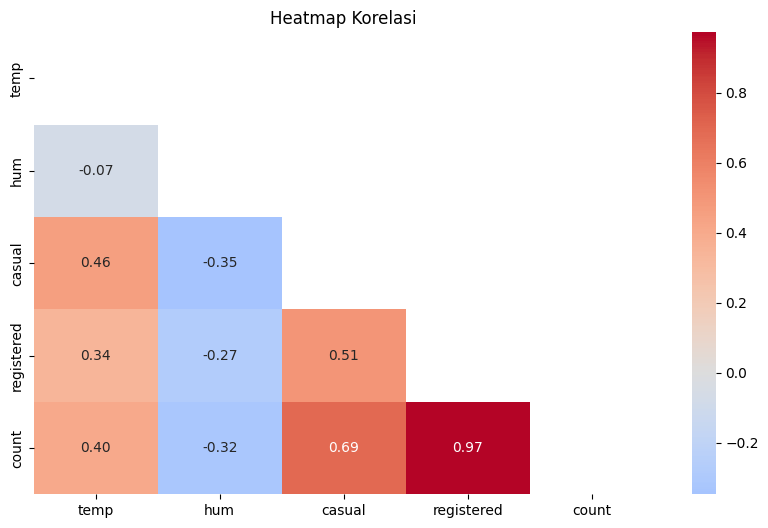

In [159]:
correlation_matrix = df_jam[['temp',  'hum', 'casual', 'registered', 'count']].corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, mask=mask, cmap='coolwarm', center=0, fmt=".2f")
plt.title("Heatmap Korelasi")
plt.show()


Berdasarkan heatmap:

1. **Temp dan hum** memiliki korelasi sangat lemah (**-0.07**).
2. **Casual** berkorelasi sedang dengan **temp** (**0.46**) dan negatif dengan **hum** (**-0.35**).
3. **Registered** memiliki korelasi lemah dengan **temp** (**0.34**) dan moderat dengan **casual** (**0.51**).
4. **Count** berkorelasi kuat dengan **casual** (**0.69**) dan sangat kuat dengan **registered** (**0.97**), serta sedikit negatif dengan **hum** (**-0.32**).

Suhu berpengaruh lebih besar pada penyewaan dibanding kelembapan.

## Visualization & Explanatory Analysis

#### Pertanyaan 1: Bagaimana tren penggunaan layanan Bike sharing dalam beberapa tahun terakhir, serta bagaimana pola penggunaannya berdasarkan waktu harian dan hari-hari dalam seminggu?

<ipython-input-160-2ed40ba0d9cd>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_jam, x='year', y='count', ci=None)


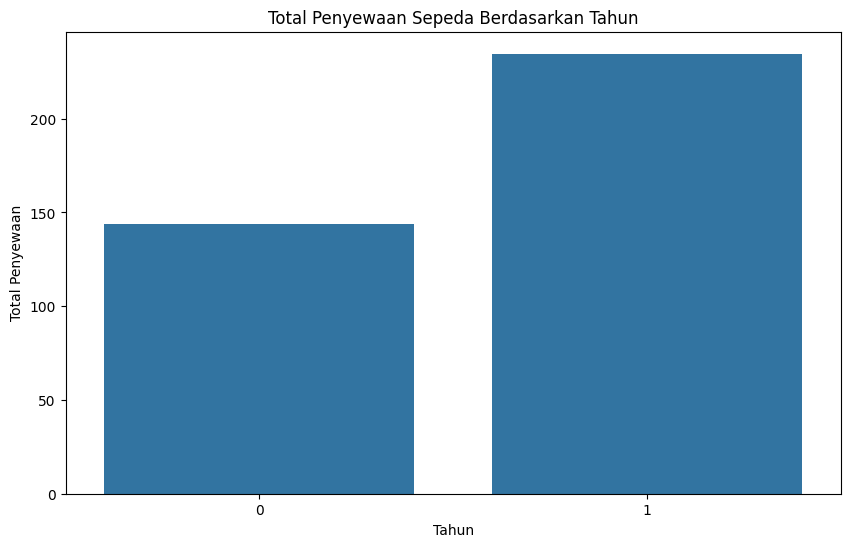

In [160]:
# 1. penggunaan layanan sepeda dari tahun ke tahun
plt.figure(figsize=(10, 6))
sns.barplot(data=df_jam, x='year', y='count', ci=None)
plt.title('Total Penyewaan Sepeda Berdasarkan Tahun')
plt.xlabel('Tahun')
plt.ylabel('Total Penyewaan')
plt.show()

Berdasarkan barplot ini, terlihat bahwa penggunaan layanan sepeda meningkat dari tahun pertama (ditampilkan sebagai 0) ke tahun kedua (ditampilkan sebagai 1).

Tahun kedua memiliki jumlah penyewaan yang lebih tinggi dibandingkan tahun pertama.
Tren ini menunjukkan adanya pertumbuhan dalam penggunaan layanan sepeda dari satu tahun ke tahun berikutnya.

<ipython-input-166-aebd4478cf9a>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_counts = df_jam.groupby(by=["month", "year"]).agg({


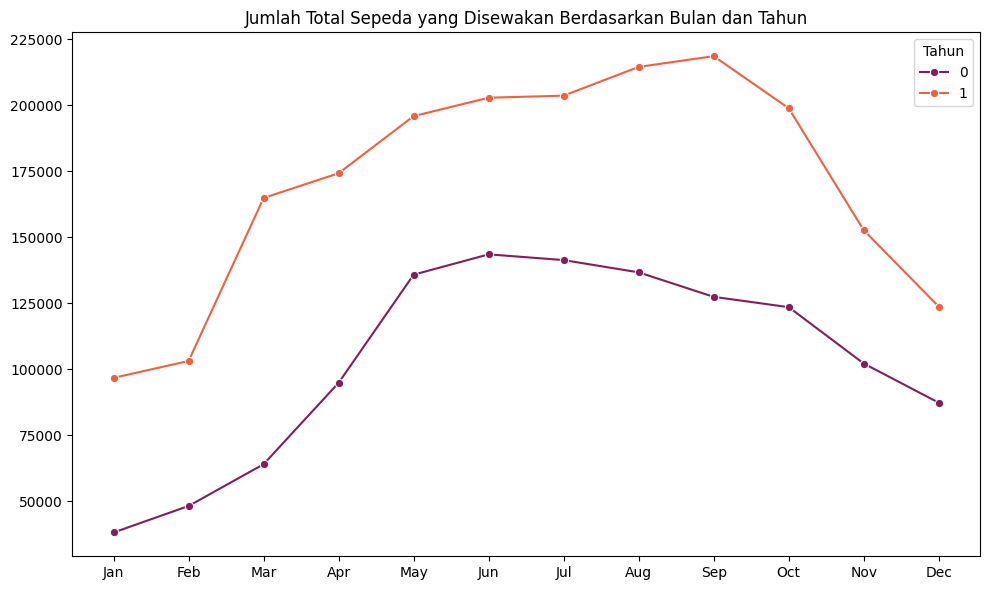

In [166]:
df_jam['month'] = pd.Categorical(df_jam['month'], categories=
    ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
    ordered=True)

monthly_counts = df_jam.groupby(by=["month", "year"]).agg({
    "count": "sum"
}).reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(
    data=monthly_counts,
    x="month",
    y="count",
    hue="year",
    palette="rocket",
    marker="o"
)

plt.title("Jumlah Total Sepeda yang Disewakan Berdasarkan Bulan dan Tahun")
plt.xlabel(None)
plt.ylabel(None)
plt.legend(title="Tahun", loc="upper right")
plt.tight_layout()
plt.show()

- Untuk kedua tahun, penggunaan sepeda meningkat dari Januari hingga mencapai puncaknya di bulan Agustus dan September, kemudian menurun drastis menjelang November dan Desember.
- Juni hingga September merupakan periode dengan penyewaan tertinggi di kedua tahun, dengan penurunan dimulai setelah bulan September.

<ipython-input-162-ade50d19a5f6>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_jam, x='hour', y='count', ci=None)


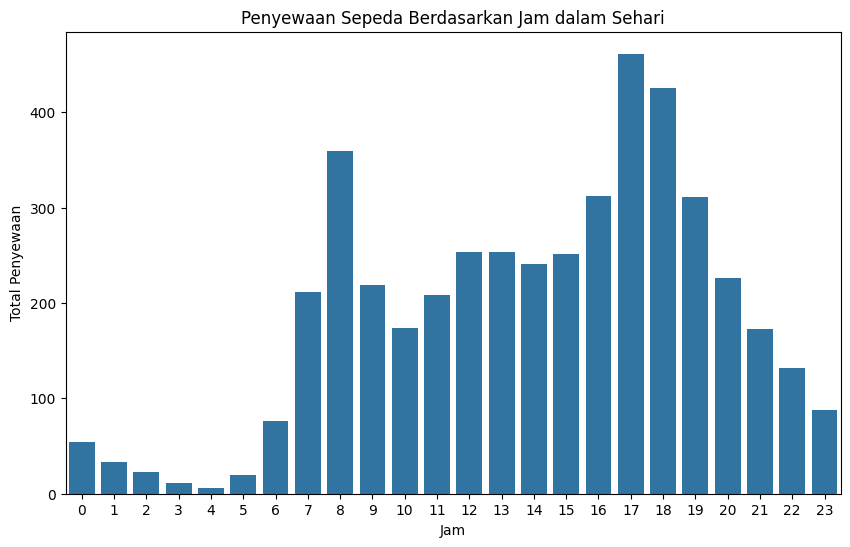

In [162]:
# 2. Pola penggunaan harian (berdasarkan jam dalam sehari)
plt.figure(figsize=(10, 6))
sns.barplot(data=df_jam, x='hour', y='count', ci=None)
plt.title('Penyewaan Sepeda Berdasarkan Jam dalam Sehari')
plt.xlabel('Jam')
plt.ylabel('Total Penyewaan')
plt.show()

- Penyewaan sepeda cenderung rendah pada dini hari (jam 0 hingga jam 5).
- Puncak penyewaan terjadi pada jam 8 pagi dan jam 5 sore.
- Terdapat penurunan penyewaan pada siang hari, dengan sedikit peningkatan lagi menjelang sore (sekitar jam 15 hingga jam 18).
- Setelah jam 18, penyewaan cenderung menurun hingga malam hari.

Pola tersebut menunjukkan bahwa sepeda paling sering digunakan selama jam sibuk pagi dan sore hari.

<ipython-input-163-f5b7bef5c09b>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_jam, x='weekday', y='count', ci=None, order=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])


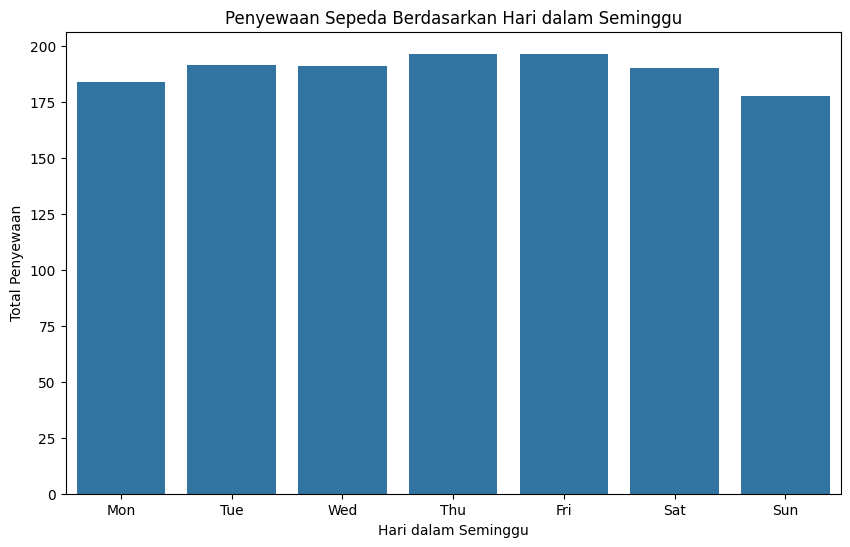

In [163]:
# 3. Pola penggunaan berdasarkan hari-hari dalam seminggu
plt.figure(figsize=(10, 6))
sns.barplot(data=df_jam, x='weekday', y='count', ci=None, order=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.title('Penyewaan Sepeda Berdasarkan Hari dalam Seminggu')
plt.xlabel('Hari dalam Seminggu')
plt.ylabel('Total Penyewaan')
plt.show()

Berdasarkan barplot ini, penggunaan sepeda cukup merata sepanjang minggu.

- Penyewaan sedikit lebih banyak pada hari **Jumat** dan **Sabtu**.
- **Minggu** memiliki jumlah penyewaan yang lebih rendah dibandingkan dengan hari-hari lainnya.
- Secara keseluruhan, tidak ada perbedaan besar antara hari kerja (Senin-Jumat) dan akhir pekan (Sabtu-Minggu), menunjukkan bahwa sepeda digunakan secara konsisten setiap hari.

### Pertanyaan 2: Apakah ada pengaruh faktor cuaca, seperti musim dan suhu udara, terhadap penggunaan layanan Bike Sharing?

<ipython-input-164-deeea3a217b9>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_jam, x='season', y='count', ci=None, palette='Set2')
<ipython-input-164-deeea3a217b9>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_jam, x='season', y='count', ci=None, palette='Set2')


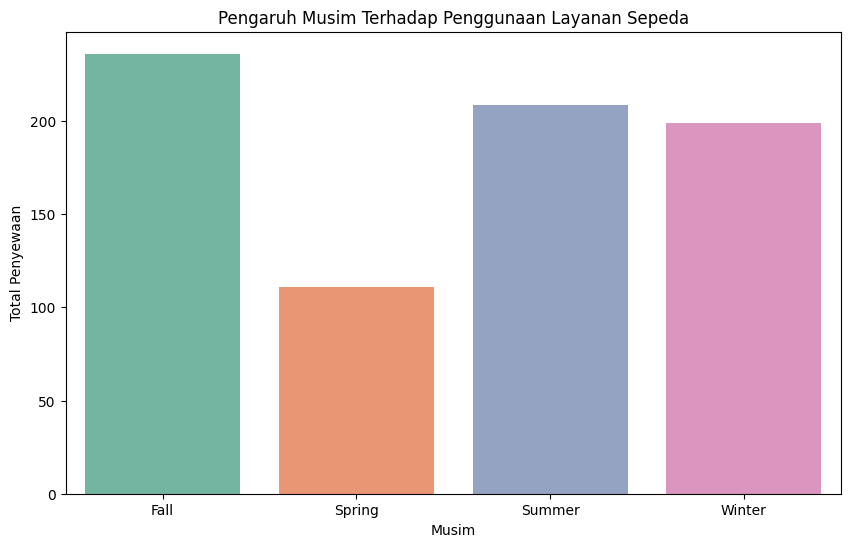

In [164]:
#untuk melihat pengaruh musim (season) terhadap penggunaan layanan sepeda
plt.figure(figsize=(10, 6))
sns.barplot(data=df_jam, x='season', y='count', ci=None, palette='Set2')
plt.title('Pengaruh Musim Terhadap Penggunaan Layanan Sepeda')
plt.xlabel('Musim')
plt.ylabel('Total Penyewaan')
plt.show()

Berdasarkan barplot di atas, terlihat bahwa musim memiliki pengaruh terhadap penggunaan layanan sepeda berbagi:

- Penggunaan sepeda paling tinggi terjadi pada musim **gugur (Fall)**, diikuti oleh **musim panas (Summer)** dan **musim dingin (Winter)**.
- **Musim semi (Spring)** memiliki jumlah penyewaan terendah dibandingkan musim lainnya.

Dari hasil ini, dapat disimpulkan bahwa cuaca yang lebih sejuk di musim gugur dan panas di musim panas mendorong lebih banyak orang untuk menggunakan layanan sepeda, sedangkan pada musim semi, penggunaan cenderung lebih rendah.

<ipython-input-165-654ade589425>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=top_10_temp, x='temp', y='count', ci=None, palette='coolwarm')
<ipython-input-165-654ade589425>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_temp, x='temp', y='count', ci=None, palette='coolwarm')


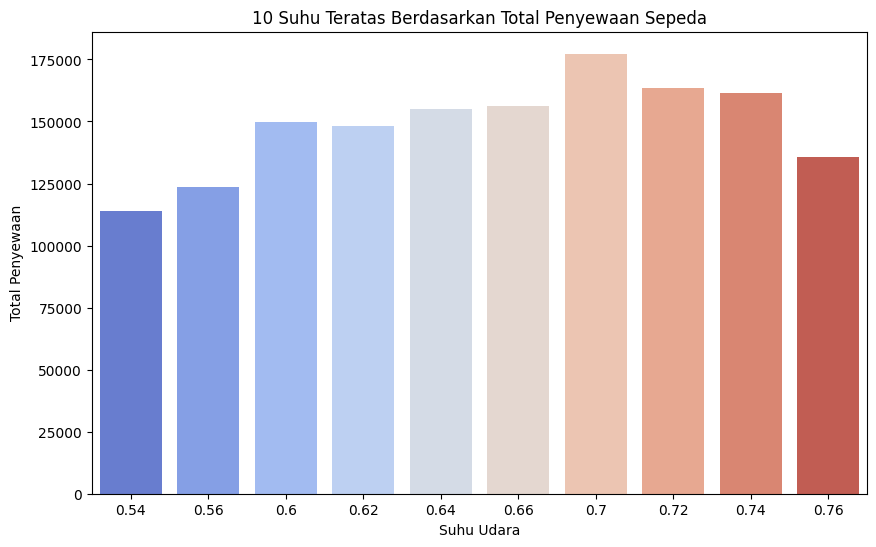

In [165]:
top_10_temp = df_jam.groupby('temp')['count'].sum().nlargest(10).reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=top_10_temp, x='temp', y='count', ci=None, palette='coolwarm')
plt.title('10 Suhu Teratas Berdasarkan Total Penyewaan Sepeda')
plt.xlabel('Suhu Udara')
plt.ylabel('Total Penyewaan')
plt.show()

Barplot ini menunjukkan 10 suhu teratas berdasarkan total penyewaan sepeda. Dari visualisasi ini, dapat disimpulkan bahwa:

- Penyewaan sepeda tertinggi terjadi pada suhu sekitar **0.70** hingga **0.74**, yang mencerminkan kondisi suhu yang cukup hangat namun nyaman untuk aktivitas bersepeda.
- Secara umum, penyewaan sepeda lebih banyak terjadi pada suhu sedang hingga hangat, dengan total penyewaan tertinggi berkisar antara **0.64** hingga **0.76**.
- Penyewaan sepeda cenderung lebih rendah pada suhu yang lebih rendah, seperti **0.54** dan **0.56**.

Dapat disimpulkan bahwa suhu yang lebih hangat berkontribusi terhadap lebih banyaknya penggunaan layanan sepeda berbagi.

## Analisis Lanjutan (Opsional)

### Menghitung Recency

In [173]:
df_jam['dateday'] = pd.to_datetime(df_jam['dateday'])

# Menghitung Recency (hari sejak penyewaan terakhir)
current_date = df_jam['dateday'].max()
rfm_df = df_jam.groupby('dateday').agg({
    'dateday': lambda x: (current_date - x.max()).days,  # Recency
    'count': 'sum',  # Frequency
    'count': 'sum'  # Monetary
}).rename(columns={'dateday': 'recency', 'count': 'frequency', 'count': 'monetary'})

print(rfm_df.head())

            recency  monetary
dateday                      
2011-01-01      730       985
2011-01-02      729       801
2011-01-03      728      1349
2011-01-04      727      1562
2011-01-05      726      1600


- Recency: Mengukur jumlah hari sejak penyewaan terakhir sampai tanggal yang ada di baris tersebut. Misalnya, untuk 2011-01-01, sudah 730 hari berlalu sejak tanggal terakhir dalam dataset.

- Monetary: Menunjukkan total penyewaan sepeda pada setiap tanggal. Misalnya, pada 2011-01-05, total penyewaan sepeda adalah 1600.

###  Visualisasi RFM Analysis

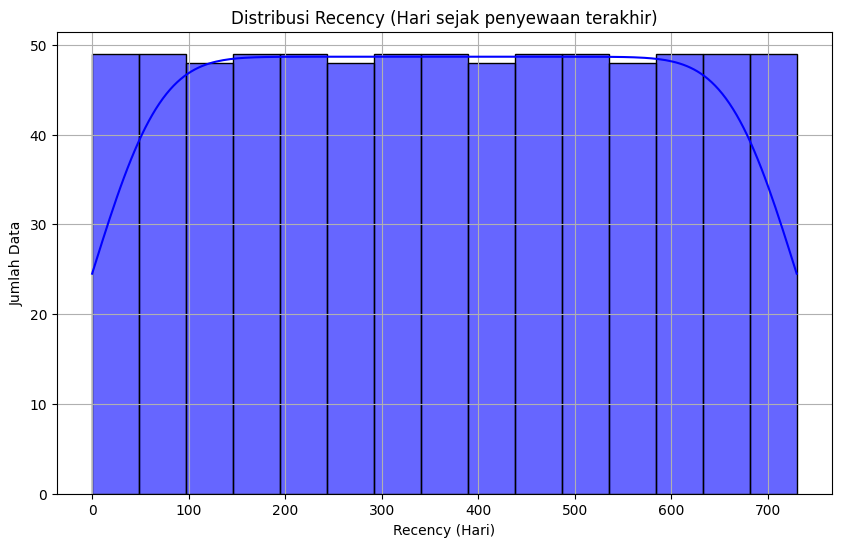

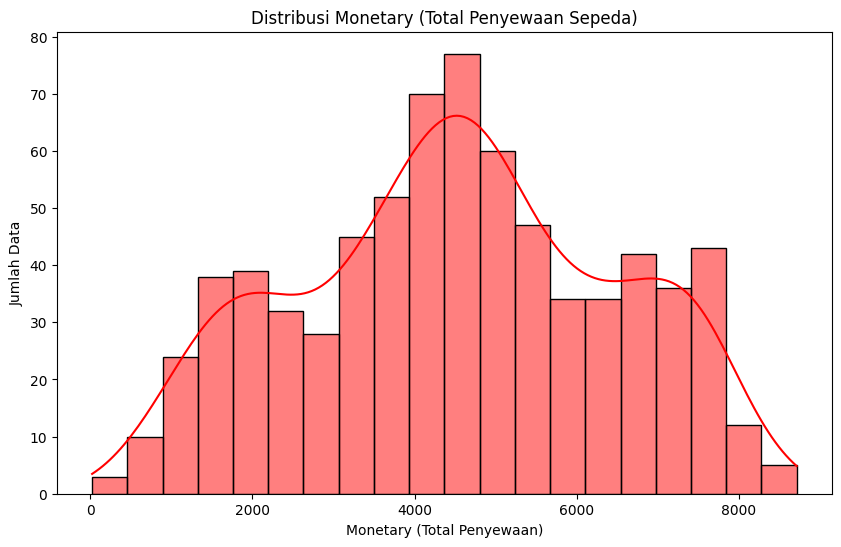

In [175]:
plt.figure(figsize=(10, 6))
sns.histplot(rfm_df['recency'], bins=15, kde=True, color='blue', alpha=0.6)
plt.title('Distribusi Recency (Hari sejak penyewaan terakhir)')
plt.xlabel('Recency (Hari)')
plt.ylabel('Jumlah Data')
plt.grid(True)
plt.show()

# Membuat distribusi Monetary
plt.figure(figsize=(10, 6))
sns.histplot(rfm_df['monetary'], bins=20, kde=True, color='red')
plt.title('Distribusi Monetary (Total Penyewaan Sepeda)')
plt.xlabel('Monetary (Total Penyewaan)')
plt.ylabel('Jumlah Data')
plt.show()

- Grafik pertama menunjukkan distribusi recency, yaitu waktu sejak penyewaan terakhir. Penyewaan cukup merata hingga sekitar 700 hari, kemudian jumlahnya menurun. Artinya, penyewaan terjadi secara teratur tanpa pola waktu tertentu yang dominan.

- Grafik kedua menunjukkan distribusi monetary atau total penyewaan sepeda. Kebanyakan penyewaan terjadi di kisaran 3000-5000, dengan distribusi berbentuk lonceng, yang berarti jumlah penyewaan terbanyak ada di tengah-tengah kisaran tersebut.

### **Grouping Berdasarkan Suhu**

In [168]:
# Membagi suhu menjadi beberapa kategori berdasarkan interval
df_jam['temp_group'] = pd.cut(df_jam['temp'], bins=[0, 0.3, 0.6, 1], labels=['Dingin', 'Sedang', 'Panas'])

# Menampilkan data dengan kategori suhu
print(df_jam[['temp', 'temp_group', 'count']].head())


   temp temp_group  count
0  0.24     Dingin     16
1  0.22     Dingin     40
2  0.22     Dingin     32
3  0.24     Dingin     13
4  0.24     Dingin      1


### **visualisasi barplot untuk kategori suhu (temp_group) berdasarkan total penyewaan (count)**

<ipython-input-176-d2f8a0d0fb5c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='temp_group', y='count', data=df_jam, estimator=sum, palette='coolwarm')


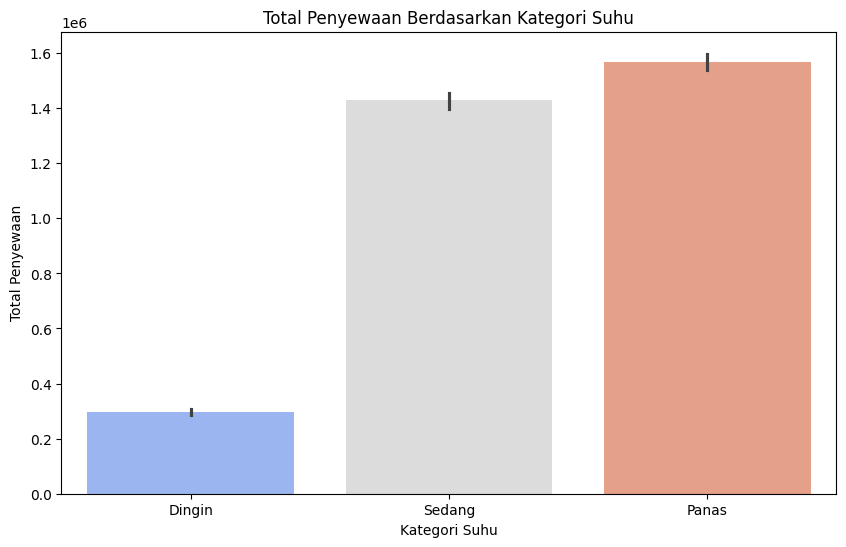

In [176]:
plt.figure(figsize=(10, 6))
sns.barplot(x='temp_group', y='count', data=df_jam, estimator=sum, palette='coolwarm')
plt.title('Total Penyewaan Berdasarkan Kategori Suhu')
plt.xlabel('Kategori Suhu')
plt.ylabel('Total Penyewaan')
plt.show()

### Clustering

In [169]:
# Membagi jumlah penyewaan menjadi beberapa kategori
df_jam['count_group'] = pd.cut(df_jam['count'], bins=[0, 10, 20, 30, 100], labels=['Rendah', 'Sedang', 'Tinggi', 'Sangat Tinggi'])

# Menampilkan data dengan kategori penyewaan
print(df_jam[['count', 'count_group']].head())


   count    count_group
0     16         Sedang
1     40  Sangat Tinggi
2     32  Sangat Tinggi
3     13         Sedang
4      1         Rendah


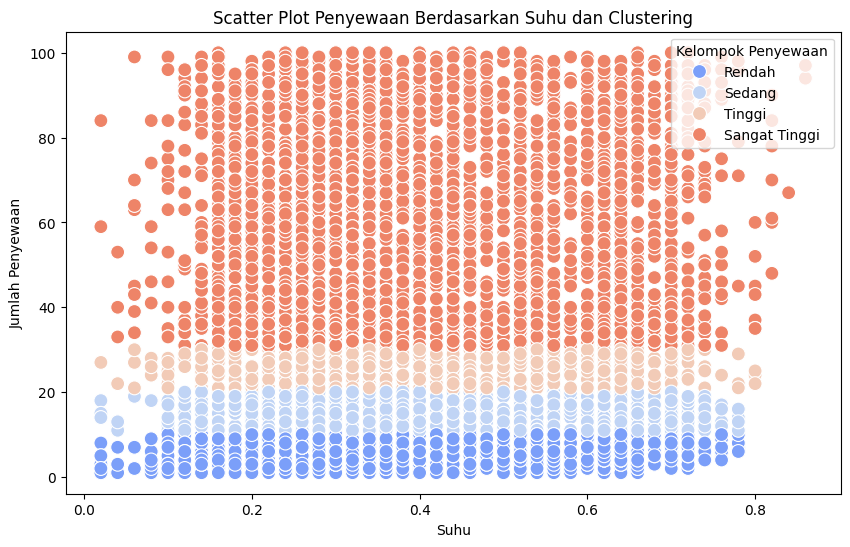

In [180]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temp', y='count', hue='count_group', data=df_jam, palette='coolwarm', s=100)
plt.title('Scatter Plot Penyewaan Berdasarkan Suhu dan Clustering')
plt.xlabel('Suhu')
plt.ylabel('Jumlah Penyewaan')
plt.legend(title='Kelompok Penyewaan')
plt.show()

- Pada suhu rendah (sekitar 0.0-0.4), jumlah penyewaan lebih didominasi oleh kelompok Rendah dan Sedang, dengan sedikit penyewaan yang masuk ke kelompok Tinggi dan Sangat Tinggi.
- Pada suhu lebih tinggi (sekitar 0.5 ke atas), kelompok Tinggi dan Sangat Tinggi mulai mendominasi, menunjukkan bahwa lebih banyak penyewaan sepeda terjadi saat suhu semakin panas.

## Conclusion

- Conclution pertanyaan 1 : Bagaimana tren penggunaan layanan sepeda dalam beberapa tahun terakhir, serta bagaimana pola penggunaannya berdasarkan waktu harian dan hari-hari dalam seminggu?

Penggunaan layanan sepeda berbagi menunjukkan pola yang jelas berdasarkan waktu harian dan hari-hari dalam seminggu. Penyewaan sepeda mencapai puncaknya pada jam sibuk pagi dan sore hari, yang mengindikasikan banyak pengguna memanfaatkan sepeda untuk perjalanan harian seperti berangkat dan pulang kerja. Selain itu, penyewaan sepeda relatif konsisten sepanjang minggu, dengan sedikit peningkatan pada hari kerja dibandingkan akhir pekan.


- Conclution pertanyaan 2 : Apakah ada pengaruh faktor cuaca, seperti musim dan suhu udara, terhadap penggunaan layanan sepeda ?

Faktor cuaca, khususnya suhu, memiliki pengaruh terhadap penggunaan sepeda berbagi. Penyewaan sepeda cenderung meningkat pada suhu yang lebih hangat, dengan puncaknya di suhu sedang hingga tinggi. Di sisi lain, saat suhu lebih rendah, penggunaan sepeda berkurang. Selain itu, musim juga berpengaruh, di mana penyewaan lebih tinggi pada musim panas dan gugur dibandingkan musim dingin atau semi.

In [181]:
df_jam.to_csv('df_jam_analisis.csv', index=False)